# Isolation Forest

## まとめ

## 参考
* https://www.slideshare.net/kataware/isolation-forest
* https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf
* https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e

# 実装

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

Automatically created module for IPython interactive environment


In [3]:
rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

In [4]:
# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train) # 異常値を含まない
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attr

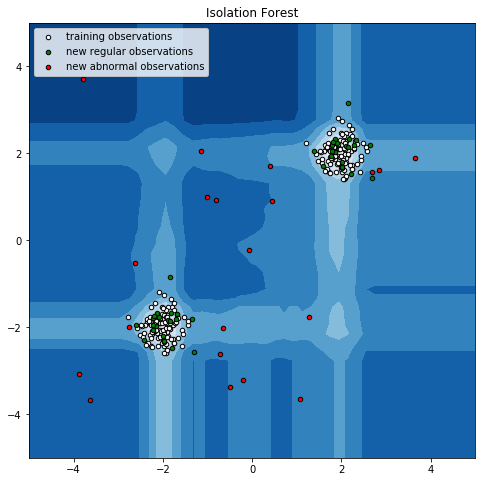

In [17]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure( figsize=[8,8])
plt.title("Isolation Forest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")

plt.show()

In [6]:
from matplotlib.colors import Normalize

def plot_true_false( data, result, score, vmax=None, vmin=None ):
    res_minus = ( result < 0 )
    res_plus = ( result > 0 )

    norm=Normalize(vmin=vmin, vmax=vmax)

    plt.figure( figsize=[10,6] )
    plt.scatter( data[res_plus,0], data[res_plus,1], c=score[res_plus], s=10, norm=norm )
    plt.scatter( data[res_minus,0], data[res_minus,1], c=score[res_minus], marker='x',norm=norm )
    plt.colorbar()

In [7]:
scr_train = clf.decision_function(X_train)
scr_test  = clf.decision_function(X_test)
scr_outliers = clf.decision_function(X_outliers)

In [8]:
X_all = np.concatenate( ( X_train, X_test, X_outliers ) )
scr_all = np.concatenate( ( scr_train, scr_test, scr_outliers ) )
y_pred_all = np.concatenate( ( y_pred_train, y_pred_test, y_pred_outliers ) )

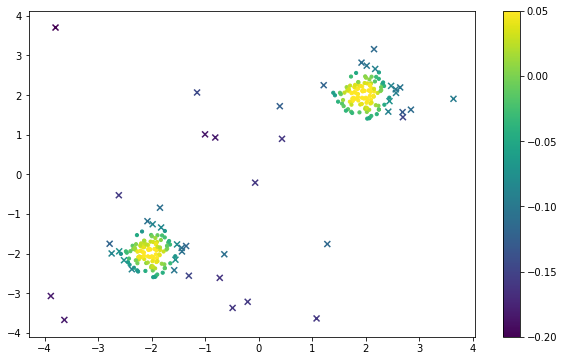

In [9]:
plot_true_false( X_all, y_pred_all, scr_all, vmax=0.05, vmin=-0.2)

(array([ 5.,  7.,  5., 17., 17., 24., 33., 33., 61., 58.]),
 array([-0.20889639, -0.18043303, -0.15196967, -0.12350631, -0.09504295,
        -0.0665796 , -0.03811624, -0.00965288,  0.01881048,  0.04727384,
         0.07573719]),
 <a list of 10 Patch objects>)

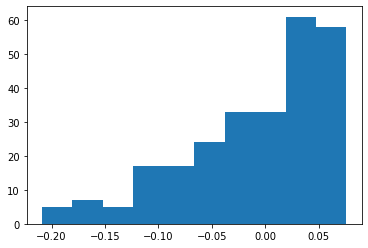

In [10]:
plt.hist( scr_all )

In [11]:
%qtconsole